In [1]:

# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math
from scipy import stats
from scipy.signal import find_peaks, spectrogram

# packages for visualizations
import matplotlib.dates as mdates

from matplotlib import pyplot as plt


In [2]:
ev_load = './smartMeter/1minute_data_austin.csv'

df=pd.read_csv(ev_load ,  nrows=10000000)



In [3]:
# Filter out rows where 'car1' column is not NaN
filtered_df = df[df['car1'].notna()]

# Get the list of unique dataid values from the filtered DataFrame
unique_dataids_with_car1_values = filtered_df['dataid'].unique()

# Print the list of unique dataid values with non-NaN car1 values
print(unique_dataids_with_car1_values)

# [ 661 1642 2335 4373 6139 7719 9278 8156 4767]

[ 661 1642 2335 4373 6139 7719 9278 8156 4767]


In [4]:
# Filter the DataFrame to include only dataid 7982
filtered_df = df.loc[df['dataid'] == 661]

# Display the filtered DataFrame
filtered_df

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-01-01 01:21:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,661,2018-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,661,2018-01-01 01:01:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,661,2018-01-01 01:02:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,661,2018-01-01 01:03:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159691,661,2018-11-01 00:49:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.486,124.119
9159692,661,2018-11-01 00:50:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.535,124.174
9159693,661,2018-11-01 00:51:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.586,124.223
9159694,661,2018-11-01 00:52:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.618,124.254


In [5]:

# Assuming your DataFrame is called df
filtered_df.fillna(0, inplace=True)

/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_66681/3518980308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


In [6]:
# Drop columns with all NaN values
filtered_df = filtered_df.dropna(axis=1, how='all')

# Display the filtered DataFrame
filtered_df

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-01-01 01:21:00-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
1,661,2018-01-01 01:00:00-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,661,2018-01-01 01:01:00-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
3,661,2018-01-01 01:02:00-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
4,661,2018-01-01 01:03:00-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159691,661,2018-11-01 00:49:00-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.486,124.119
9159692,661,2018-11-01 00:50:00-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.535,124.174
9159693,661,2018-11-01 00:51:00-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.586,124.223
9159694,661,2018-11-01 00:52:00-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.618,124.254


In [7]:
# Filter the DataFrame to include only dataid 661
filtered_df = df.loc[df['dataid'] == 661]

# Display the filtered DataFrame
filtered_df

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-01-01 01:21:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,661,2018-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,661,2018-01-01 01:01:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,661,2018-01-01 01:02:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,661,2018-01-01 01:03:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159691,661,2018-11-01 00:49:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.486,124.119
9159692,661,2018-11-01 00:50:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.535,124.174
9159693,661,2018-11-01 00:51:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.586,124.223
9159694,661,2018-11-01 00:52:00-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.618,124.254


In [8]:
filtered_df['localminute'] = pd.to_datetime(filtered_df['localminute'])


/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_66681/3278232417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['localminute'] = pd.to_datetime(filtered_df['localminute'])


In [9]:
filtered_df.set_index('localminute', inplace=True)
df.reset_index(inplace=True)


In [12]:
df.reset_index(inplace=True)

filtered_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
localminute,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:21:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:01:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:02:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:03:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-01 00:49:00-05:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.486,124.119
2018-11-01 00:50:00-05:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.535,124.174
2018-11-01 00:51:00-05:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.586,124.223


In [19]:
filtered_df.index.name = None

downsampled_df = filtered_df.asfreq('30T')


In [21]:
downsampled_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
2018-01-01 01:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:30:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 21:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.079,123.660
2018-11-30 22:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.041,123.630
2018-11-30 22:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.155,123.732
2018-11-30 23:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.350,123.799


In [22]:
# Calculate the sum of values across all columns for each row
downsampled_df['aggregated'] = downsampled_df.sum(axis=1, skipna=True)

# Print the DataFrame with the new aggregated column
downsampled_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,aggregated
2018-01-01 01:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.429
2018-01-01 01:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.221
2018-01-01 02:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2018-01-01 02:30:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2018-01-01 03:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 21:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.079,123.660,908.844
2018-11-30 22:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.041,123.630,908.485
2018-11-30 22:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.155,123.732,908.701
2018-11-30 23:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.350,123.799,909.203


In [23]:
downsampled_df['aggregated_without_car1'] = downsampled_df['aggregated'] - downsampled_df['car1']


downsampled_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,aggregated,aggregated_without_car1
2018-01-01 01:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.429,663.429
2018-01-01 01:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.221,662.221
2018-01-01 02:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
2018-01-01 02:30:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
2018-01-01 03:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 21:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,123.079,123.660,908.844,908.843
2018-11-30 22:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,123.041,123.630,908.485,908.484
2018-11-30 22:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,123.155,123.732,908.701,908.700
2018-11-30 23:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,123.350,123.799,909.203,909.201


/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_66681/1195714544.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  for week, group in downsampled_df.groupby(downsampled_df.index.week):


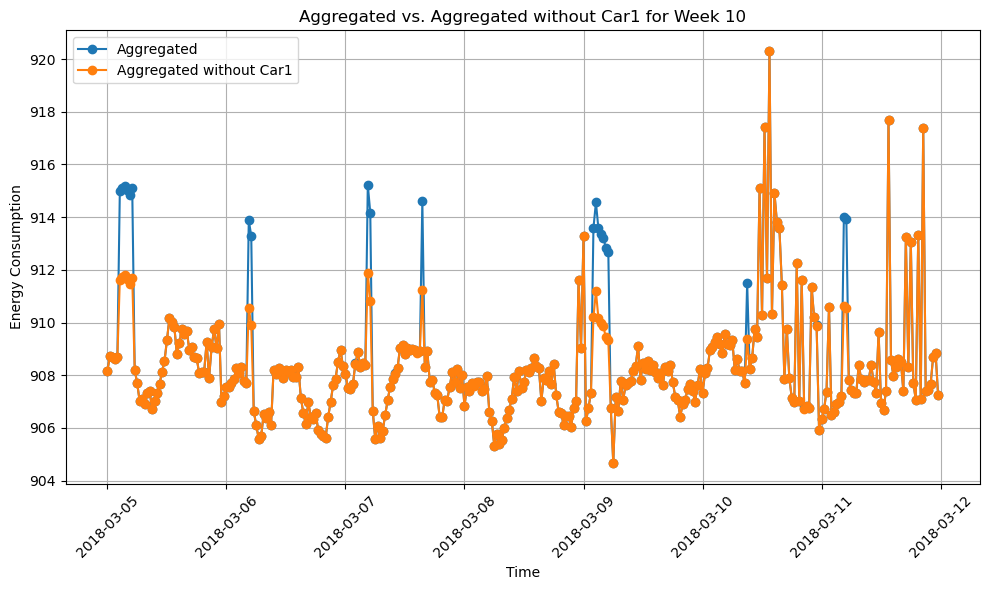

In [24]:
weekly_dfs = []
for week, group in downsampled_df.groupby(downsampled_df.index.week):
    weekly_dfs.append(group)

# Select only the DataFrame for week 10
df_week_10 = weekly_dfs[9]  # Week numbering starts from 0, so week 10 corresponds to index 9

# Plotting week 10
plt.figure(figsize=(10, 6))
plt.plot(df_week_10.index, df_week_10['aggregated'], marker='o', linestyle='-', label='Aggregated')
plt.plot(df_week_10.index, df_week_10['aggregated_without_car1'], marker='o', linestyle='-', label='Aggregated without Car1')
plt.title('Aggregated vs. Aggregated without Car1 for Week 10')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
from hmmlearn import hmm

# Step 2: Model Selection
n_components = 3  # Number of states in the HMM
model = hmm.GaussianHMM(n_components=n_components, covariance_type="full")

# Step 3: Training
# Train the HMM using the aggregated data
model.fit(downsampled_df)

# Step 4: Disaggregation
# Use the trained HMM to predict hidden states for disaggregated data
hidden_states = model.predict(downsampled_df)

# You can then use the hidden states to disaggregate the data
# For example, you can assign each observation to the most likely state
# and use the corresponding mean value as the disaggregated value

# Assuming disaggregated_data is a DataFrame with the same index as aggregated_data
disaggregated_data = downsampled_df.copy()
for i, state in enumerate(hidden_states):
    disaggregated_data.iloc[i] = model.means_[state]


ValueError: Input contains NaN.